<a href="https://colab.research.google.com/github/rajeev-shivaram/PyTorch101/blob/master/Deep_Neural_Networks_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

When Linear models are unable to represent a set of data, a non-linear model is used.

This is done by combining two or more perceptrons. the two perceptrons models can be of linear nature and are superimposed to form the  third models.

Subsequent to the training of our neural network the data samples through some decision boundry, the process of then receiving an input to produce some kind of output to make some kind of predction is known as feed forward. 

Feed forward NN are the core of many NN such as Convolution NN. Also, FFNN do not have any feedback loops or connections in network, simply an input layer, (multiple) hidden layer and an output layer.

The input layer provides the data and output makes predictions based on series of function activations in hidden layer.

The steps followed are:
1. Feedforward to predict all outputs.
2. Determine total Error with cross entropy.
3. Backpropogation (to update all the weights of models throughout the NN).
4. Repeat at some learning rate.

With FF, we can predict the outputs for all of our training data.
With outputs of all the data points predicted by the model to the actual outputs of our labelled data.
The more misclassifications there are, higher the error which is calculated with the cross-entropy formula

-($\sum_{0}^{\infty} y * ln(p) - (1-y) * ln(1-p)$)
                        
the average of the ln of the predictions of the points being in class 1 + the line of the probabilities of the points being clause zero and then apply some form of gradient descent .

By taking the negitive of gradient of error function minimizes error the most and backpropogate this until a suitable point is reached.
(i) The gradient is the derivative of error function with respect to all weights in our neural network.

In [0]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from tqdm import tqdm

In [0]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
# noise refers to the gausian noise added to the function, a larger noise value will cause them to deviate more
# factor refers to the size of inner circle to the outter circle, here 0.2 means inner circle will be 0.2 times diameter the outter circle

In [0]:
# converting them from numpy arrays to tensors
x_data = torch.FloatTensor(X)
y_data = torch.FloatTensor(y.reshape(500, 1))

print(x_data.type())
print(y_data.type())

torch.FloatTensor
torch.FloatTensor


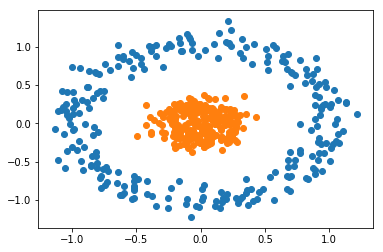

In [0]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1]) # X values where y==0 in 0 column, X vals where y==0 in 1 column
    plt.scatter(X[y==1, 0], X[y==1, 1]) # X values where y==1 in 0 column, X vals where y==1 in 1 column
scatter_plot()

In [0]:
# Model

class Model(nn.Module):
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)
    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    def predict(self, x):
        pred = model.forward(x)
        if pred >= 0.5:
          return 1
        else:
          return 0

In [0]:
torch.manual_seed(2)
model = Model(2, 4, 1) # imagine 2 nodes as input, 4 hidden_layers and 1 output
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

Adam Optim is one of many optimization algos and what differenciates it the most is its adaptive learning methodology and its effeciency.
The Adam optim is a combination of two other extensions of stochastic gradient descent viz Adagrad & RMSprop.
The learning rates are manually set in gradient descent and if its too low, the model takes time to reach convergence and if its too high, reaches convergence very fast ie hinders it and they maintain a single learning rate for all backprops throught training.
Adam optim computes adaptive learning rates for each parameters and has been proven while dealing with large models and datasets

In [0]:
epochs = 1000
losses = []
for i in tqdm(range(epochs), ascii=True):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print('Epoch spent:', epochs, 'Loss:', losses[-1])    

100%|###############################################################################| 1000/1000 [00:01<00:00, 902.75it/s]


Epoch spent: 1000 Loss: 0.0016064508818089962


Text(0.5, 1.0, 'Learning Rate = 0.01')

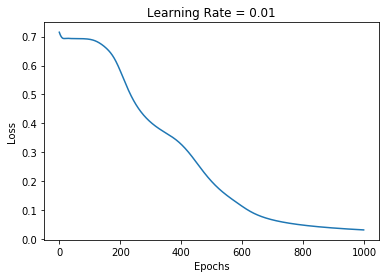

In [0]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(range(epochs), losses)
plt.title('Learning Rate = 0.01')

Text(0.5, 1.0, 'Learning Rate = 0.1')

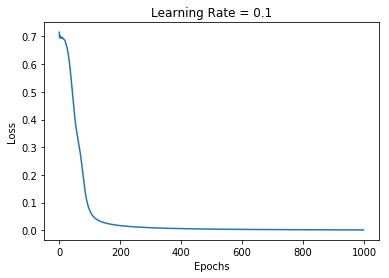

In [0]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(range(epochs), losses)
plt.title('Learning Rate = 0.1')

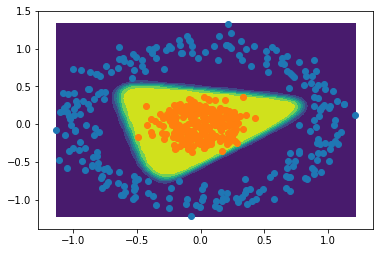

In [0]:
def plot_decision_boundry(X, y):
    """
    Return a contour plot of decision boundry
    """
    # define the span of grid 
    x_span = np.linspace(min(X[:, 0]), max(X[:, 0]))
    y_span = np.linspace(min(X[:, 1]), max(X[:, 1]))
    
    
    xx, yy = np.meshgrid(x_span, y_span) # xx & yy holds a square two dim array
    # meshgrid takes a single vector cantaining 50 elements and returns a two dimensional 50x50 matrix
    
    # flatten the xx & yy arrays into one dimension
    grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]) 
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    # use detach method to exclude any subgraphs grom gradient computation that would associated with values from pred_func
    
    plt.contourf(xx, yy, z)

plot_decision_boundry(X, y)
scatter_plot()

In [0]:
# Explaining meshgrid

def explaining_meshgrid(X, y):
    """
    Explain how meshgrid works with an example
    """
    x_span = np.linspace(min(X[:, 0]), max(X[:, 0]), 3)
    y_span = np.linspace(min(X[:, 1]), max(X[:, 1]), 3)
        
    xx, yy = np.meshgrid(x_span, y_span)
    print('\n ***MeshGrid***')
    print(xx, '\n')
    print(yy)
    
    print('\n ***Ravel***')
    print(xx.ravel(),'\n', yy.ravel())

explaining_meshgrid(X, y)



 ***MeshGrid***
[[-1.13339265  0.04095722  1.21530709]
 [-1.13339265  0.04095722  1.21530709]
 [-1.13339265  0.04095722  1.21530709]] 

[[-1.22178655 -1.22178655 -1.22178655]
 [ 0.05350155  0.05350155  0.05350155]
 [ 1.32878965  1.32878965  1.32878965]]

 ***Ravel***
[-1.13339265  0.04095722  1.21530709 -1.13339265  0.04095722  1.21530709
 -1.13339265  0.04095722  1.21530709] 
 [-1.22178655 -1.22178655 -1.22178655  0.05350155  0.05350155  0.05350155
  1.32878965  1.32878965  1.32878965]


Prediction is 1


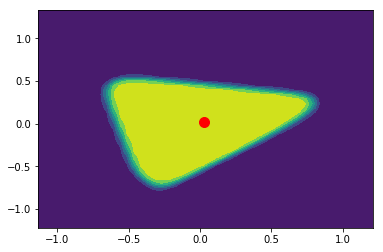

In [0]:
# Test with a random value
x, y = 0.025, 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print("Prediction is", prediction)
plot_decision_boundry(X, y)